In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Analytical Geometry with Linear Algebra
Actually, the process of the linear transformation is to transform some vector from a circle to an ellipse, which is determined by its eigenvalues and eigenvectors. We can use a 2D matrix to visualize this process

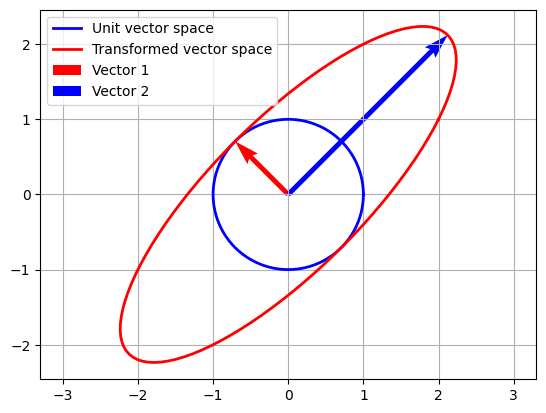

In [16]:
# Define a matrix A
A = np.array([[2, 1],
              [1, 2]])

# Define the unit vector in the scale of Cartesian coordinate system 
theta = np.linspace(0, 2*np.pi, 100)
radius = 1
x = radius * np.cos(theta)
y = radius * np.sin(theta)
u = np.column_stack((x, y))

# Perform the transformation
v = A @ u.T

# Eigenvalue and Eigenvector of A
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Plot
plt.plot(x, y, 'b-', linewidth=2, label="Unit vector space")
plt.plot(v[0], v[1], 'r-', linewidth=2, label="Transformed vector space")
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], 
           angles='xy', scale_units='xy', scale=1 / eigenvalues[0], 
           color='red', width=0.01, label='Vector 1')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], 
           angles='xy', scale_units='xy', scale=1 / eigenvalues[1], 
           color='blue', width=0.01, label='Vector 2')

plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

Now, let's see how $\textbf{x}^T\textbf{Ax}=1$ looks like.

The two conjugat axes satisfies $\textbf{x}_i=\frac{1}{\sqrt{\lambda_i}}\textbf{v}_1$.

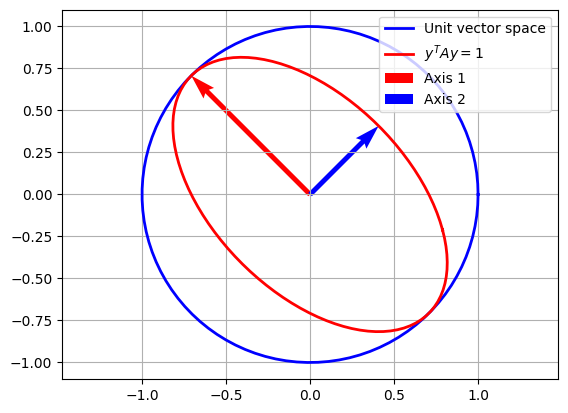

In [18]:
u = np.column_stack((x, y))
# Construct A^{-1/2}
D_inv_sqrt = np.diag(1 / np.sqrt(eigenvalues))
A_inv_sqrt = eigenvectors @ D_inv_sqrt @ eigenvectors.T

# Perform the correct transformation
v = A_inv_sqrt @ u.T

# Plot
plt.plot(x, y, 'b-', linewidth=2, label="Unit vector space")
plt.plot(v[0], v[1], 'r-', linewidth=2, label=r"$y^T A y = 1$")

plt.quiver(0, 0,
           eigenvectors[0, 0] / np.sqrt(eigenvalues[0]),
           eigenvectors[1, 0] / np.sqrt(eigenvalues[0]),
           angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label='Axis 1')

plt.quiver(0, 0,
           eigenvectors[0, 1] / np.sqrt(eigenvalues[1]),
           eigenvectors[1, 1] / np.sqrt(eigenvalues[1]),
           angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label='Axis 2')

plt.legend(loc='upper right')
plt.axis('equal')
plt.grid(True)
plt.show()

For a non-symmetry matrix, the angle of the eigenvector is not orthogonal.

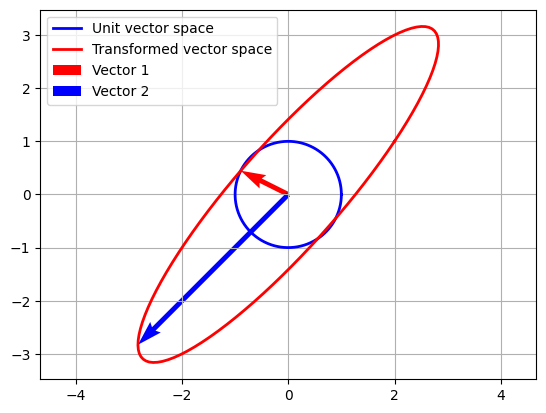

In [19]:
# Define a matrix A
A = np.array([[2, 2],
              [1, 3]])

# Define the unit vector in the scale of Cartesian coordinate system 
theta = np.linspace(0, 2*np.pi, 100)
radius = 1
x = radius * np.cos(theta)
y = radius * np.sin(theta)
u = np.column_stack((x, y))

# Perform the transformation
v = A @ u.T

# Eigenvalue and Eigenvector of A
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot
plt.plot(x, y, 'b-', linewidth=2, label="Unit vector space")
plt.plot(v[0], v[1], 'r-', linewidth=2, label="Transformed vector space")
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], 
           angles='xy', scale_units='xy', scale=1 / abs(eigenvalues[0]), 
           color='red', width=0.01, label='Vector 1')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], 
           angles='xy', scale_units='xy', scale=1 / abs(eigenvalues[1]), 
           color='blue', width=0.01, label='Vector 2')

plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

Note that the eigenvector will not point to the tip of the ellipse since the non-symmetry matrix not only do the stretching or shrinking, but also do the rotating and shearing. The eigendecomposition cannot fully represent this step. We need a singular value decompostion (SVD) to deal with it.

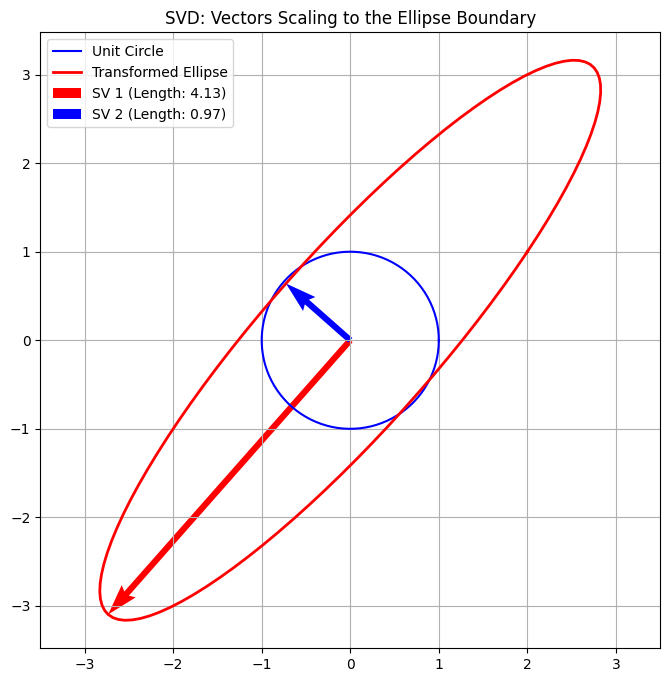

In [24]:
# Define the matrix A
A = np.array([[2, 2],
              [1, 3]])

# Create the unit circle
theta = np.linspace(0, 2*np.pi, 100)
u = np.array([np.cos(theta), np.sin(theta)]) # 2 x 100 matrix

# Transform the circle into an ellipse
v = A @ u

# SVD
U, S, Vh = np.linalg.svd(A)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(u[0], u[1], 'b-', label="Unit Circle")
plt.plot(v[0], v[1], 'r-', linewidth=2, label="Transformed Ellipse")

# Plot Singular Vector
# U is the direction, S is the length
plt.quiver(0, 0, U[0, 0]*S[0], U[1, 0]*S[0], 
           angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.01, label=f'SV 1 (Length: {S[0]:.2f})')

plt.quiver(0, 0, U[0, 1]*S[1], U[1, 1]*S[1], 
           angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.01, label=f'SV 2 (Length: {S[1]:.2f})')

plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("SVD: Vectors Scaling to the Ellipse Boundary")
plt.show()